In [1]:
import Pkg

In [2]:
# Pkg.add("StatsPlots")

In [3]:
import StatsPlots as stplt
import DataFrames as dtfr
import CSV
import Plots as plt

using Statistics

In [4]:
result_path = "/mnt/beegfs/projects/power-conv/result/optimize100.csv"
result_df = dtfr.DataFrame(CSV.File(result_path))


,optimizer,trainloss,physicsloss,testloss,duration_seconds,randomseed
,String15,Float64,Float64,Float64,Float64,Int64
1,adam,0.00352303,0.0278234,0.00137727,0.57143,0
2,sgd,0.0918105,0.271336,2.25567,0.195984,0
3,lbfgs,0.205342,0.178055,3.36599,3.82706,0
4,bayesopt,0.0337557,0.128938,0.480241,57.9912,0
5,bayesopt->adam,0.00654592,0.0153632,0.00115342,56.3985,0
6,bayesopt->sgd,0.0774346,0.171434,2.20053,57.8136,0
7,bayesopt->lbfgs,0.00689274,0.0501865,0.0125812,58.5481,0
8,adam,0.0467824,0.179421,1.58191,0.219543,1
9,sgd,0.0750453,0.220398,2.08469,0.187513,1


In [5]:
# replace nan and clamp value for more convenient plot
# for col in dtfr.eachcol(result_df)
for losscol in split("trainloss physicsloss testloss")
    replace!(result_df[!, losscol], NaN => -1)
#     clamp!(result_df[!, losscol], -Inf, 5)
end

result_df[:, :totalloss] = result_df[:, :trainloss] + result_df[:, :physicsloss] + result_df[:, :testloss]
result_df

,optimizer,trainloss,physicsloss,testloss,duration_seconds,randomseed
,String15,Float64,Float64,Float64,Float64,Int64
1,adam,0.00352303,0.0278234,0.00137727,0.57143,0
2,sgd,0.0918105,0.271336,2.25567,0.195984,0
3,lbfgs,0.205342,0.178055,3.36599,3.82706,0
4,bayesopt,0.0337557,0.128938,0.480241,57.9912,0
5,bayesopt->adam,0.00654592,0.0153632,0.00115342,56.3985,0
6,bayesopt->sgd,0.0774346,0.171434,2.20053,57.8136,0
7,bayesopt->lbfgs,0.00689274,0.0501865,0.0125812,58.5481,0
8,adam,0.0467824,0.179421,1.58191,0.219543,1
9,sgd,0.0750453,0.220398,2.08469,0.187513,1


In [6]:
# plt.plot(size=(1200, 600), ylim=(-2, 4))
# @stplt.df result_df stplt.violin!(:optimizer, :testloss, linewidth=0)
# @stplt.df result_df stplt.boxplot!(string.(:optimizer), :testloss, fillalpha=0.6, linewidth=2)
# @stplt.df result_df stplt.dotplot!(string.(:optimizer), :testloss, marker=(:black, stplt.stroke(0)), fillalpha=0.6)

In [29]:
function plot_column_distribution(datadf, column; size=(1200, 600), ylim=())
    fig = plt.plot(size=size, ylabel=column, legend=:none, margin=5plt.mm, ylim=ylim)
    @stplt.df datadf stplt.violin!(:optimizer, datadf[:, column], linewidth=0)
    @stplt.df datadf stplt.boxplot!(:optimizer, datadf[:, column], fillalpha=0.6, linewidth=2)
    @stplt.df datadf stplt.dotplot!(:optimizer, datadf[:, column], marker=(:black, stplt.stroke(0)), alpha=0.8)
    return fig
end


plot_column_distribution (generic function with 1 method)

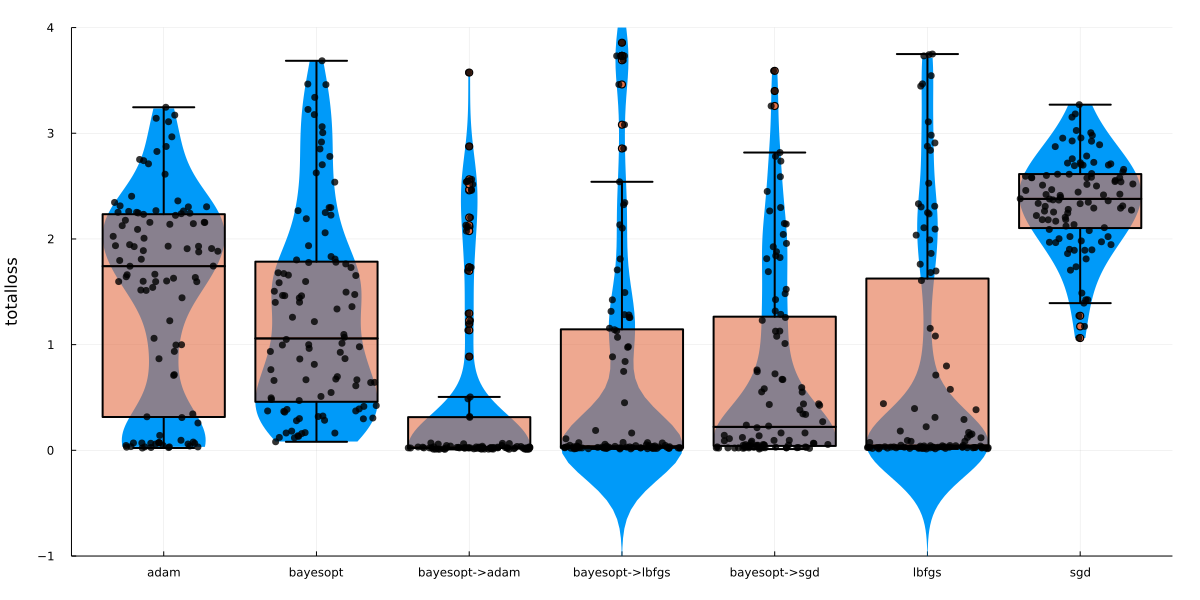

In [30]:
plot_column_distribution(result_df, "totalloss", ylim=(-1, 4))

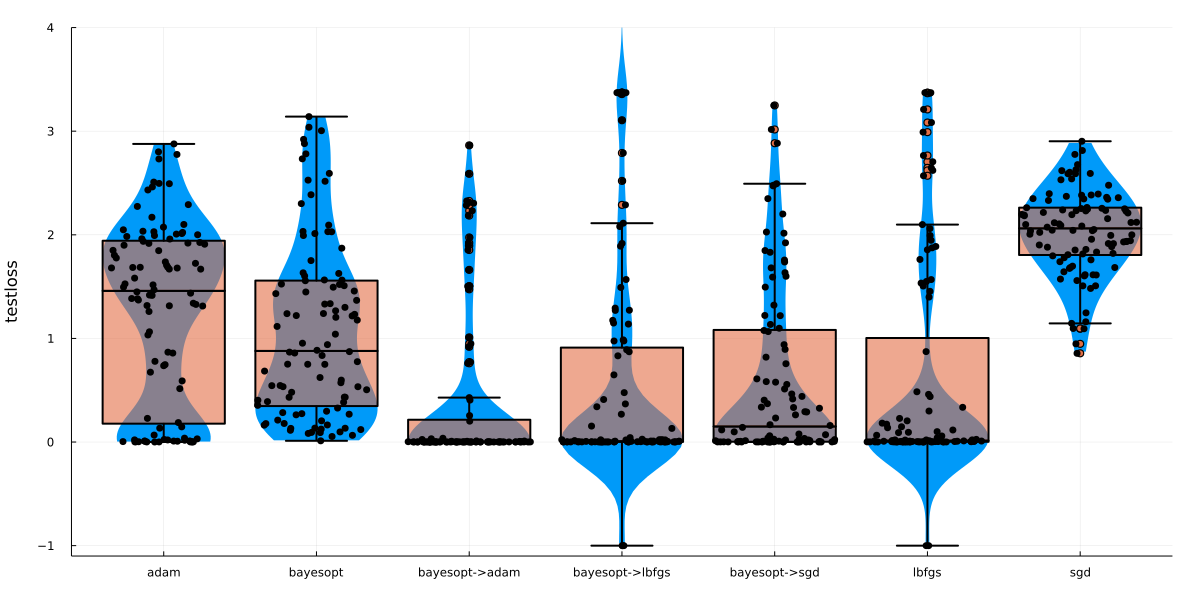

In [9]:
plot_column_distribution(result_df, "testloss", ylim=(-1.1, 4))

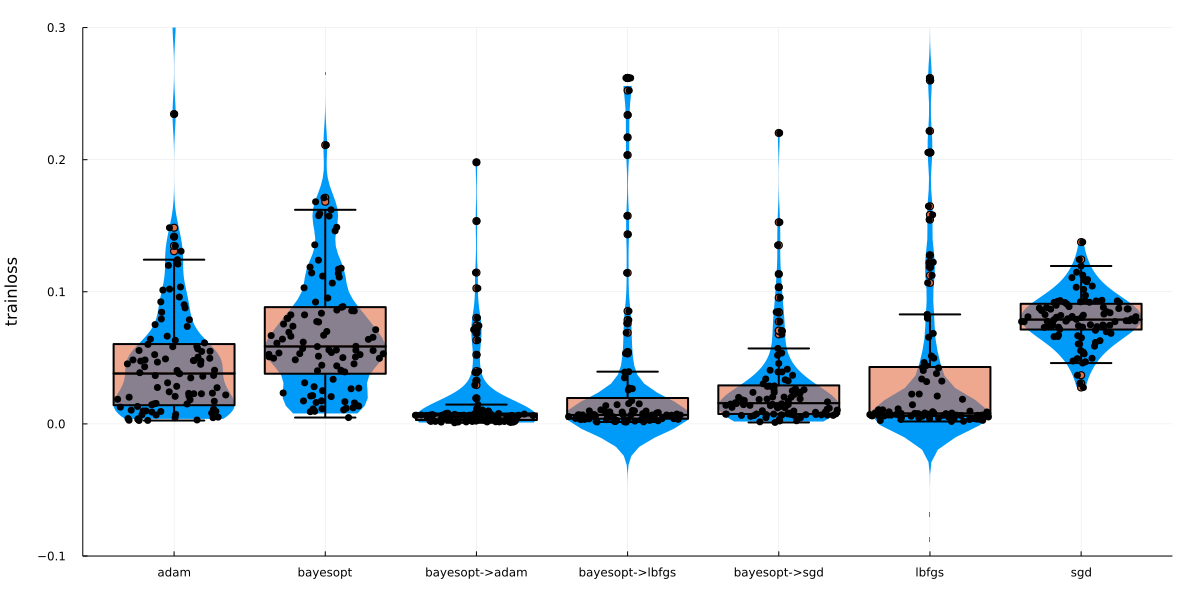

In [10]:
plot_column_distribution(result_df, "trainloss", ylim=(-0.1, 0.3))

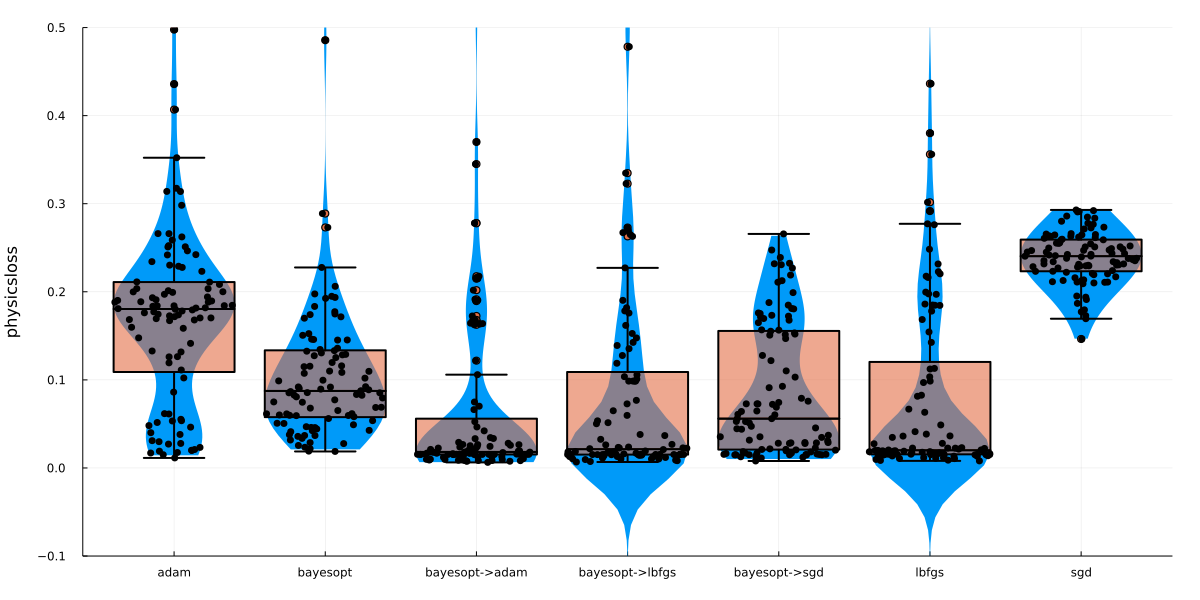

In [11]:
plot_column_distribution(result_df, "physicsloss", ylim=(-0.1, 0.5))

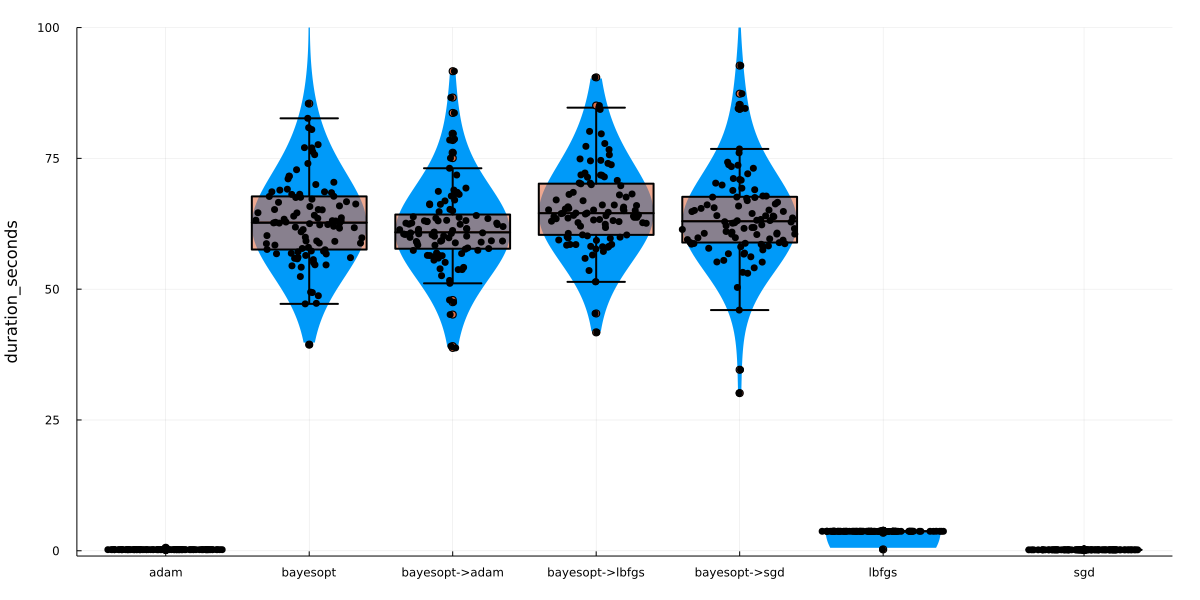

In [12]:
plot_column_distribution(result_df, "duration_seconds", ylim=(-1, 100))

In [13]:
aggregate_df = dtfr.combine(dtfr.groupby(result_df, :optimizer),
    :testloss .=> [median, mean],
    :trainloss .=> [median, mean],
    :physicsloss .=> [median, mean],
    :duration_seconds .=> [median, mean],
)

,optimizer,testloss_median,testloss_mean,trainloss_median,trainloss_mean
,String15,Float64,Float64,Float64,Float64
1,adam,1.45921,1.26413,0.0381848,0.0479169
2,sgd,2.06233,2.02717,0.0789864,0.0795836
3,lbfgs,0.013675,0.600288,0.0079671,0.0284985
4,bayesopt,0.878929,1.07612,0.0586692,0.0855649
5,bayesopt->adam,0.00129104,0.411002,0.00649535,0.0170397
6,bayesopt->sgd,0.150412,0.620497,0.0157371,0.0280928
7,bayesopt->lbfgs,0.00876433,0.627042,0.00678631,0.00507983


In [14]:
# @stplt.df aggregate_df stplt.plot(:duration_seconds_median, :testloss_median, group=:optimizer, 
#     seriestype=:scatter, ylabel="median test loss", xlabel="median duration seconds", markersize=8, palette=:seaborn_bright)
# # palette=:tab10

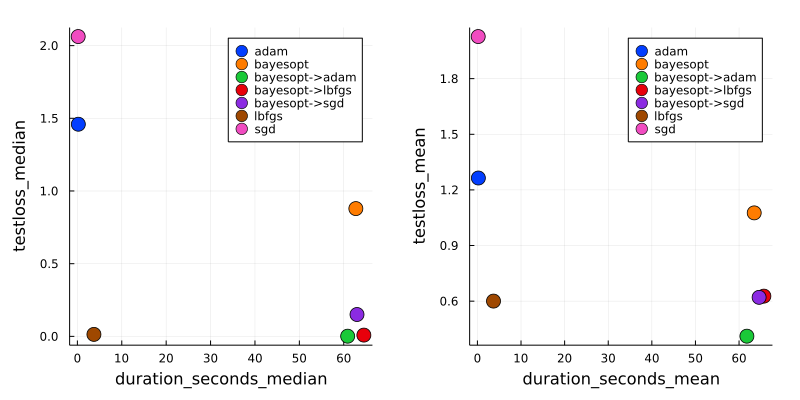

In [15]:
xcolumn = "duration_seconds_median"
ycolumn = "testloss_median"
fig1 = plt.scatter(aggregate_df[:, xcolumn], aggregate_df[:, ycolumn], group=aggregate_df[:, :optimizer],
    ylabel=ycolumn, xlabel=xcolumn, markersize=8, palette=:seaborn_bright)
# palette=:tab10

xcolumn = "duration_seconds_mean"
ycolumn = "testloss_mean"
fig2 = plt.scatter(aggregate_df[:, xcolumn], aggregate_df[:, ycolumn], group=aggregate_df[:, :optimizer],
    ylabel=ycolumn, xlabel=xcolumn, markersize=8, palette=:seaborn_bright)

# margin to avoid cropping
plt.plot(fig1, fig2, layout=(1,2), size=(800, 400), margin = 5plt.mm)

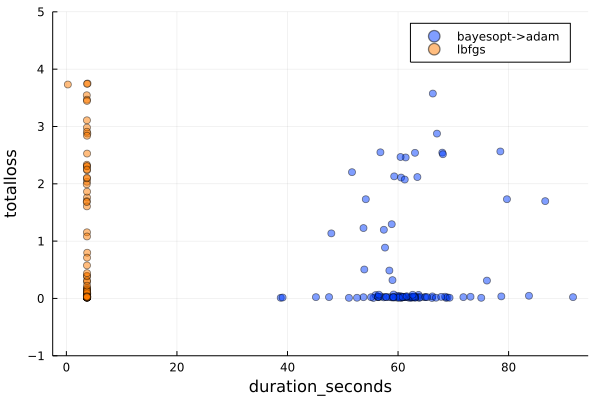

In [36]:
xcolumn = "duration_seconds"
ycolumn = "totalloss"

filtered_df = filter(row -> row.optimizer ∈ split("lbfgs bayesopt->adam"), result_df)
fig2 = plt.scatter(filtered_df[:, xcolumn], filtered_df[:, ycolumn], group=filtered_df[:, :optimizer],
    ylabel=ycolumn, xlabel=xcolumn, markersize=4, palette=:seaborn_bright, ylim=(-1, 5), alpha=0.5)